In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import datetime
import time

In [2]:
data = pd.read_csv("Python_Project_4_Log.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#2) print all the column names
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#3 describe the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#5) if there are Null values, Handle these
data = data.dropna()

In [7]:
#4) check the null value
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


WORKING WITH MODELS

In [8]:
#1) Create the target data and feature data where target data is survived
x = data.drop(['Survived','Name','Ticket','Cabin','PassengerId'],axis = 1)
y = data.Survived

In [9]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,female,38.0,1,0,71.2833,C
3,1,female,35.0,1,0,53.1000,S
6,1,male,54.0,0,0,51.8625,S
10,3,female,4.0,1,1,16.7000,S
11,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...
871,1,female,47.0,1,1,52.5542,S
872,1,male,33.0,0,0,5.0000,S
879,1,female,56.0,0,1,83.1583,C
887,1,female,19.0,0,0,30.0000,S


In [10]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
enc = LabelEncoder()

In [13]:
x['Sex'] = enc.fit_transform(x['Sex'])

In [14]:

x['Embarked'] = enc.fit_transform(x['Embarked'])

In [15]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0,38.0,1,0,71.2833,0
3,1,0,35.0,1,0,53.1000,2
6,1,1,54.0,0,0,51.8625,2
10,3,0,4.0,1,1,16.7000,2
11,1,0,58.0,0,0,26.5500,2
...,...,...,...,...,...,...,...
871,1,0,47.0,1,1,52.5542,2
872,1,1,33.0,0,0,5.0000,2
879,1,0,56.0,0,1,83.1583,0
887,1,0,19.0,0,0,30.0000,2


In [16]:
#2) Split the data into Training and testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [17]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,1,1,19.0,3,2,263.0000,2
151,1,0,22.0,1,0,66.6000,2
369,1,0,24.0,0,0,69.3000,0
889,1,1,26.0,0,0,30.0000,0
292,2,1,36.0,0,0,12.8750,0
...,...,...,...,...,...,...,...
556,1,0,48.0,1,0,39.6000,0
329,1,0,16.0,0,1,57.9792,0
96,1,1,71.0,0,0,34.6542,0
618,2,0,4.0,2,1,39.0000,2


In [18]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
319,1,0,40.0,1,1,134.5000,0
558,1,0,39.0,1,1,79.6500,2
625,1,1,61.0,0,0,32.3208,2
504,1,0,16.0,0,0,86.5000,2
887,1,0,19.0,0,0,30.0000,2


In [19]:
y_train

27     0
151    1
369    1
889    1
292    0
      ..
556    1
329    1
96     0
618    1
54     0
Name: Survived, Length: 146, dtype: int64

In [20]:
y_test.head()

319    1
558    1
625    0
504    1
887    1
Name: Survived, dtype: int64

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
#3) Create a Logistic regression model for Target and feature data
lrg = LogisticRegression()
lrg.fit(x_train,y_train)

LogisticRegression()

In [24]:
lrg.score(x_test,y_test)

0.8378378378378378

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [26]:
y_predt = lrg.predict(x_test)

In [27]:
#4) Display the Confusion Matrix


array([[ 5,  1],
       [ 5, 26]], dtype=int64)

In [28]:
#5) Find the Accuracy Score


0.8378378378378378

In [29]:
# find precision score
precision_score(y_predt,y_test)

0.9629629629629629

In [30]:
# find recall score
recall_score(y_predt,y_test)

0.8387096774193549

In [31]:
# find the f1 score
f1_score(y_predt,y_test)

0.896551724137931

In [33]:
#9) Find the probability of testing data
y_prob = lrg.predict_proba(x_test)

In [34]:
y_prob

array([[0.10138511, 0.89861489],
       [0.1320364 , 0.8679636 ],
       [0.69858631, 0.30141369],
       [0.05069796, 0.94930204],
       [0.05970102, 0.94029898],
       [0.1752044 , 0.8247956 ],
       [0.50146911, 0.49853089],
       [0.72759572, 0.27240428],
       [0.64112003, 0.35887997],
       [0.3608628 , 0.6391372 ],
       [0.43226533, 0.56773467],
       [0.08518887, 0.91481113],
       [0.54378715, 0.45621285],
       [0.40628612, 0.59371388],
       [0.06150324, 0.93849676],
       [0.39056072, 0.60943928],
       [0.46772579, 0.53227421],
       [0.43617553, 0.56382447],
       [0.15883977, 0.84116023],
       [0.06004192, 0.93995808],
       [0.37503809, 0.62496191],
       [0.07458111, 0.92541889],
       [0.42778639, 0.57221361],
       [0.07730105, 0.92269895],
       [0.67714668, 0.32285332],
       [0.177463  , 0.822537  ],
       [0.46842936, 0.53157064],
       [0.12425505, 0.87574495],
       [0.49747397, 0.50252603],
       [0.23199871, 0.76800129],
       [0.

In [35]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

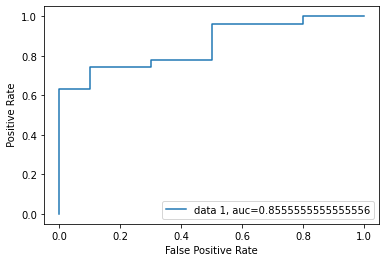

In [41]:
#10) Display ROC Curve and find the AUC score 
confusion_matrix(y_predt,y_test)
accuracy_score(y_predt,y_test)
precision_score(y_predt,y_test)

y_pred_proba = lrg.predict_proba(x_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()